In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import requests, zipfile
from io import StringIO
import io

In [31]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

student_data = pd.read_csv('student-mat.csv', sep=';')

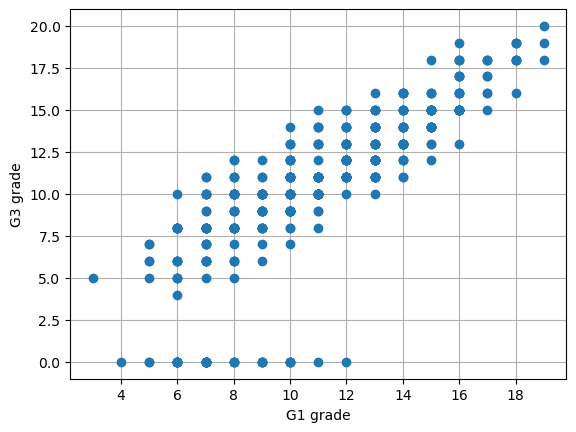

In [32]:
# Scatter plot
plt.plot(student_data['G1'],
         student_data['G3'], 'o')

# Add labels
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [33]:
# Covariance matrix
np.cov(student_data['G1'], student_data['G3'])

array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

In [34]:
# Correlation coefficient
np.corrcoef(student_data['G1'], student_data['G3'])
# If the correlation coefficient is close to 1, it indicates a 
# strong positive correlation. (strong linear dependence)

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

In [35]:
# Coefficient of Variation
cv1 = student_data['G1'].std()/student_data['G1'].mean()
cv3 = student_data['G3'].std()/student_data['G3'].mean()
print(f"The CV for G1: {cv1*100: .2f}%")
print(f"The CV for G3: {cv3*100: .2f}%")

The CV for G1:  30.43%
The CV for G3:  43.99%


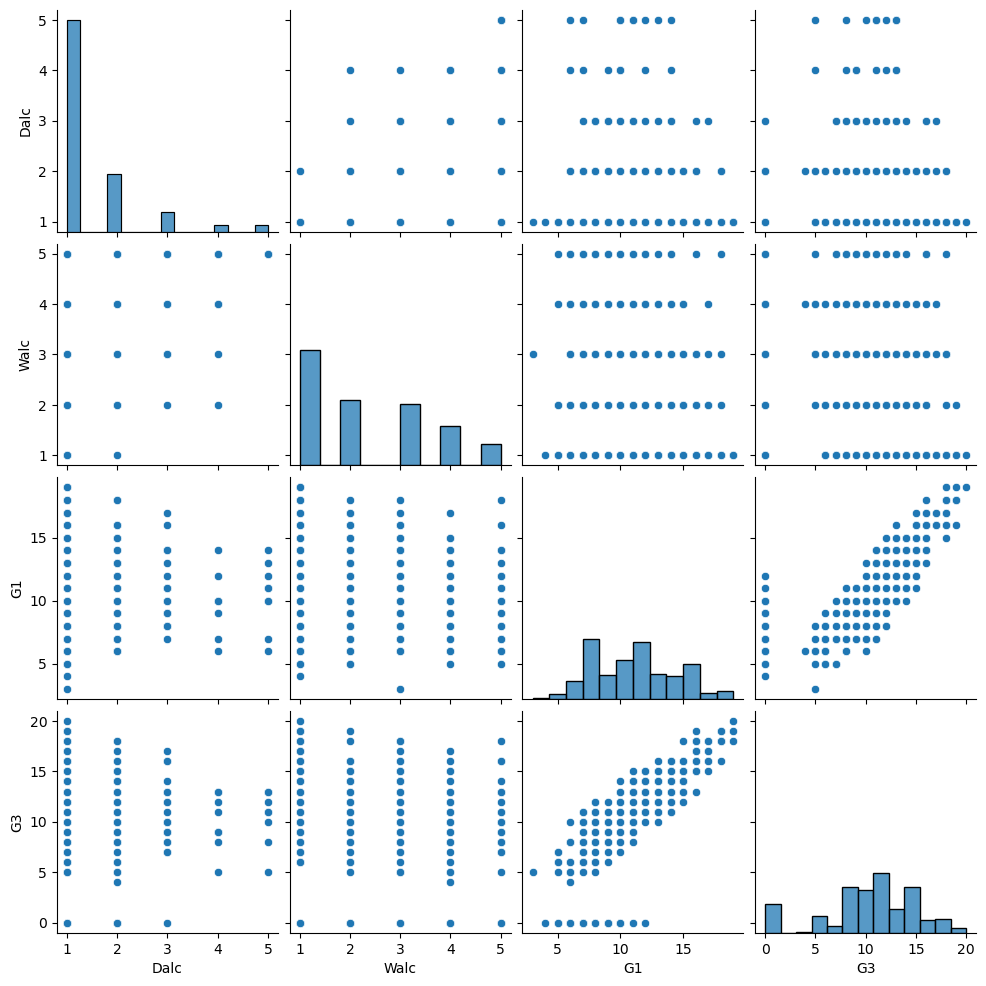

In [36]:
sns.pairplot(student_data[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [ ]:
# Define instance of linear regression
reg = linear_model.LinearRegression()

In [38]:
# Extract explanatory variable (as 2D array)
X = student_data.loc[:, ['G1']].values

# Extract response variable (as 1D aray)
Y = student_data['G3'].values

# Fit the model
reg.fit(X, Y)

# Print model parameters
print(f"Slope: {reg.coef_}")
print(f"y-Intercept: {reg.intercept_}")

Slope: [1.10625609]
y-Intercept: -1.6528038288004563


In [39]:
# Print the R^2
print(f"R-squared: {reg.score(X, Y)}")

R-squared: 0.64235084605227
